In [2]:
%matplotlib inline
import pylab
pylab.rcParams['figure.figsize'] = (16., 16.)

from sklearn.datasets import load_iris

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

### Loading the data

We'll load the dataset and perform some preliminary analysis. It's always a good idea to understand some rough statistics of data before starting with more complex machine learning tasks. 

In [3]:
# First 50 are setosa - class label 0
# Next 50 are versicolor - class label 1
# Last 50 are virginica - class label 2
# We'll only look at versicolor and virginica
iris = load_iris()
X = iris.data[50:, :]
y = iris.target[50:]

#### Histograms 

For each flower we have four measurements: sepal length, sepal width, petal length, petal width. We'll make a histogram plot of each of these features for the two types of iris---versicolor and virginica. Note that the distributions mostly overlap, though for petal measurements the overlap is significantly smaller. This suggests that using petal measurements would be a good starting point to distinguish between the types of flowers.

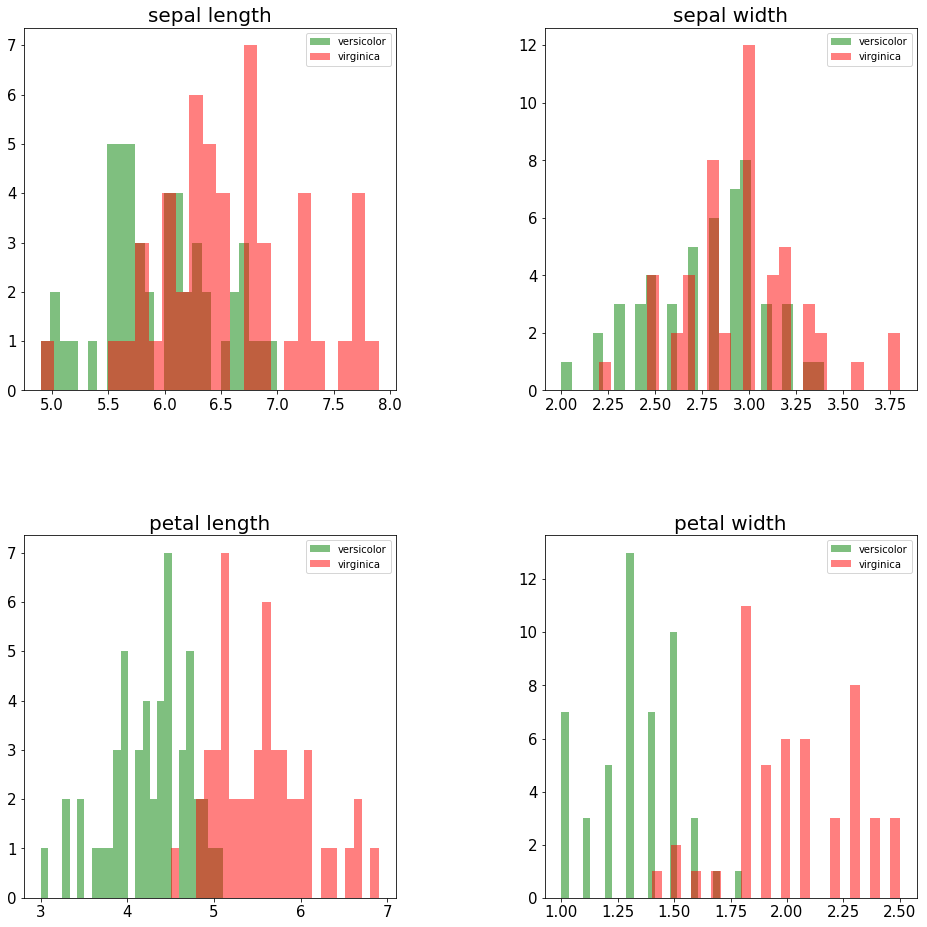

In [5]:
# titles for plots
titles = ['sepal length', 'sepal width', 'petal length', 'petal width']

for i, name in enumerate(titles):
    fig = plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    
    fig.tick_params(axis='both', labelsize=15)
    
    plt.hist(X[:50, i], 25, normed=False, facecolor='green', alpha=0.5, label='versicolor')
    plt.hist(X[50:, i], 25, normed=False, facecolor='red', alpha=0.5, label='virginica')
    
    plt.title(titles[i], fontsize=20)
    plt.legend()

plt.show()

#### Scatterplots of two features at a time

The histograms of individual measurement distributions already suggest that we could use them to identify the type of flower with some accuracy. Indeed, it may be even better if we used more than one measurement simultaneously.

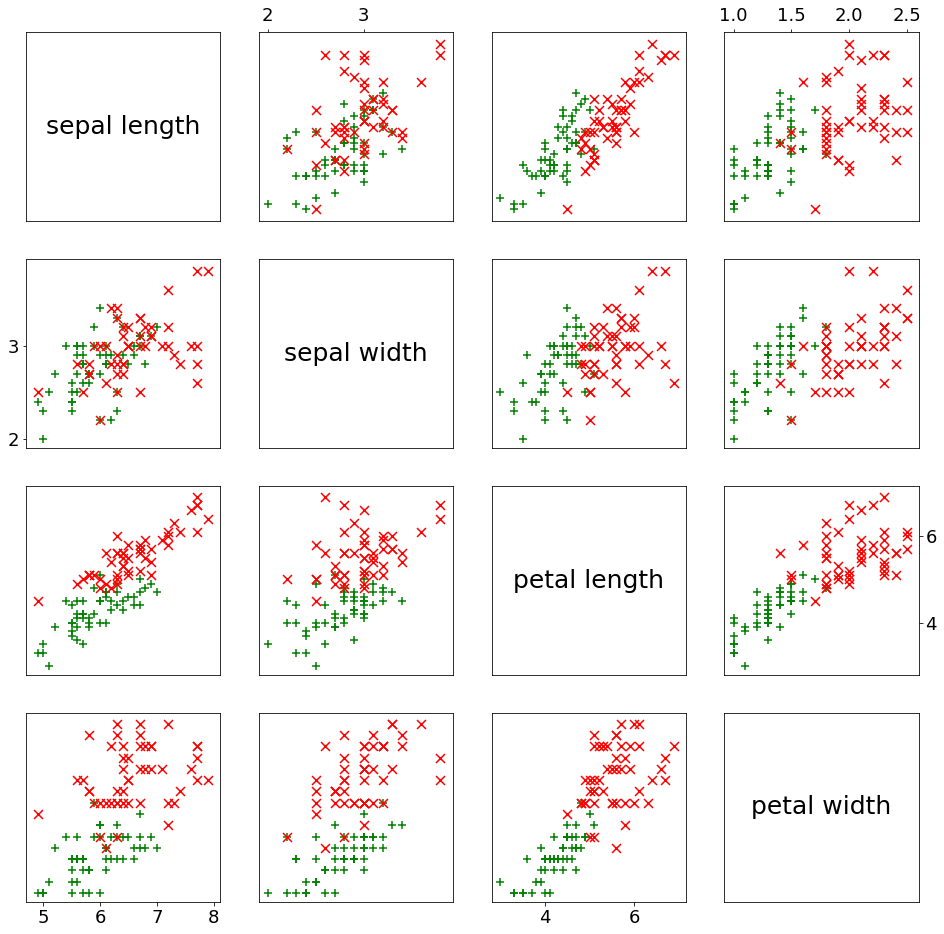

In [6]:
# Make pairwise scatter plot

names = ['sepal length', 'sepal width', 'petal length', 'petal width']

for i in range(4):
    for j in range(4):
        axes = plt.subplot(4, 4, i * 4 + j + 1)
        plt.subplots_adjust(wspace=0.2, hspace=0.2)
        
        axes.tick_params(axis='both', labelsize=18)
        plt.locator_params(nbins=4)
        
        if i != j:
            plt.scatter(X[:50, j], X[:50, i], c='green', s=80, marker=u'+')
            plt.scatter(X[50:, j], X[50:, i], c='red', s=80, marker=u'x')
        
        if i == j:
            plt.xlim((0, 1))
            plt.ylim((0, 1))
            plt.text(0.5, 0.5, names[i], size=25, horizontalalignment='center', verticalalignment='center')
        if i == 0 and j in [1, 3]:
            axes.xaxis.tick_top()
            plt.yticks(())
        elif i == 3 and j in [0, 2]:
            axes.xaxis.tick_bottom()
            plt.yticks(())
        elif j == 0 and i in [1, 3]:
            axes.yaxis.tick_left()
            plt.xticks(())
        elif j == 3 and i in [0, 2]:
            axes.yaxis.tick_right()
            plt.xticks(())
        else:
            plt.xticks(())
            plt.yticks(())
        

The scatterplots above suggest that using two features, e.g. petal length and petal width, the type of flower can be identified quite easily. Fisher uses a method to combine all four features in a systematic way, which we shall see later in the course.